In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string
import re


df = pd.read_csv('/Users/monicafam/Desktop/amazon_reviews.csv')

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
def clean_text(text):
    text = re.sub(' +', ' ', str(text))  
    text = re.sub(r'[0-9]', '', text)    
    text = text.translate(str.maketrans('', '', string.punctuation))  
    return text

df['clean_narrative'] = df['reviewText'].apply(clean_text)

missing_values = df.isnull().sum()
print('Missing Values:\n', missing_values)

data_clean = dict()
data_clean["narrative"] = np.array(df["reviewText"])
data_clean["clean narrative"] = [""] * len(data_clean["narrative"])
data_clean["vector"] = [""] * len(data_clean["narrative"])
data_clean["score"] = [""] * len(data_clean["narrative"])
data_clean["date"] = np.array(df["reviewTime"])
data_clean["date group"] = [""] * len(data_clean["narrative"])

def clean_white_space(text):
    if pd.isnull(text):
        return ""
    return re.sub(' +', ' ', text)

def remove_numbers(text):
    if pd.isnull(text):
        return ""
    return re.sub(r'[0-9]', '', text)

def remove_punctuation(text):
    if pd.isnull(text):
        return ""
    return text.translate(str.maketrans('', '', string.punctuation))

data_clean["narrative"] = [clean_white_space(text) for text in data_clean["narrative"]]
data_clean["narrative"] = [remove_numbers(text) for text in data_clean["narrative"]]
data_clean["narrative"] = [remove_punctuation(text) for text in data_clean["narrative"]]

data_clean_df = pd.DataFrame(data_clean)


missing_values_cleaned = data_clean_df.isnull().sum()
print('Missing Values in Cleaned Data:\n', missing_values_cleaned)

data_clean_df.drop_duplicates(inplace=True)

Missing Values:
 Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
clean_narrative         0
dtype: int64
Missing Values in Cleaned Data:
 narrative          0
clean narrative    0
vector             0
score              0
date               0
date group         0
dtype: int64


In [17]:
data_clean_df['narrative'].fillna('', inplace=True)

In [18]:
rows_with_missing_narrative = data_clean_df[data_clean_df['narrative'].isnull()]
print(rows_with_missing_narrative)

Empty DataFrame
Columns: [narrative, clean narrative, vector, score, date, date group]
Index: []


In [19]:
def clean_white_space(text):
    return re.sub(' +', ' ', text)

def remove_numbers(text):
    return re.sub(r'[0-9]', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

POSSIBLE_POS = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"}
KEEP_POS = {"NOUN", "VERB", "PROPN"}

def clean_part_of_speech(text):
    pass


In [20]:
# Print lengths of arrays in data_clean
for key, value in data_clean.items():
    print(f"Length of {key}: {len(value)}")


Length of narrative: 4915
Length of clean narrative: 4915
Length of vector: 4915
Length of score: 4915
Length of date: 4915
Length of date group: 4915


In [21]:
# Check lengths of arrays in data_clean
for key, value in data_clean.items():
    print(f"Length of {key}: {len(value)}")


Length of narrative: 4915
Length of clean narrative: 4915
Length of vector: 4915
Length of score: 4915
Length of date: 4915
Length of date group: 4915


In [22]:
def generate_wordcloud(text):
    stopwords_set = set(stopwords.words("english"))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white", width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


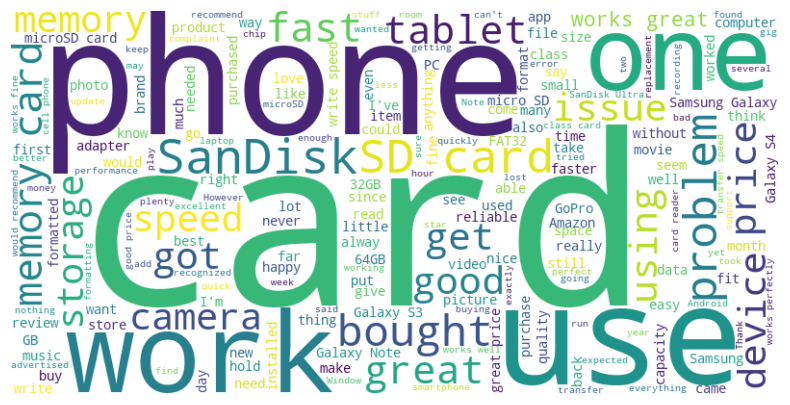

In [23]:
all_reviews_text = " ".join(review for review in df['reviewText'].astype(str))

generate_wordcloud(all_reviews_text)


In [24]:
print(data_clean.keys())

dict_keys(['narrative', 'clean narrative', 'vector', 'score', 'date', 'date group'])


In [25]:
non_empty_values = [text for text in data_clean['clean narrative'] if text]

print("Number of non-empty values:", len(non_empty_values))



Number of non-empty values: 0


In [13]:
data_clean["clean narrative"] = convert_floats_to_strings(data_clean["clean narrative"])
data_clean["clean narrative"] = [clean_white_space(text) for text in data_clean["clean narrative"]]
data_clean["clean narrative"] = [remove_numbers(text) for text in data_clean["clean narrative"]]
data_clean["clean narrative"] = [remove_punctuation(text) for text in data_clean["clean narrative"]]


NameError: name 'convert_floats_to_strings' is not defined

In [26]:
data_clean['reviewLength'] = [len(text) for text in data_clean['narrative']]

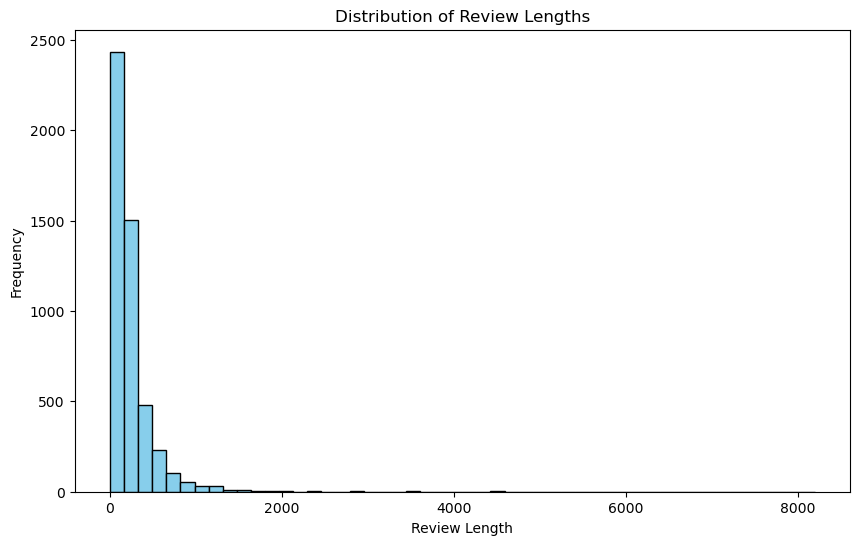

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data_clean['reviewLength'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()


In [28]:
import pandas as pd

data_clean = pd.DataFrame({'narrative': data_clean['narrative']})

data_clean['reviewLength'] = [len(text) for text in data_clean['narrative']]

zero_length_reviews = data_clean[data_clean['reviewLength'] == 0].reset_index(drop=True)
print(zero_length_reviews)


  narrative  reviewLength
0                       0


/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


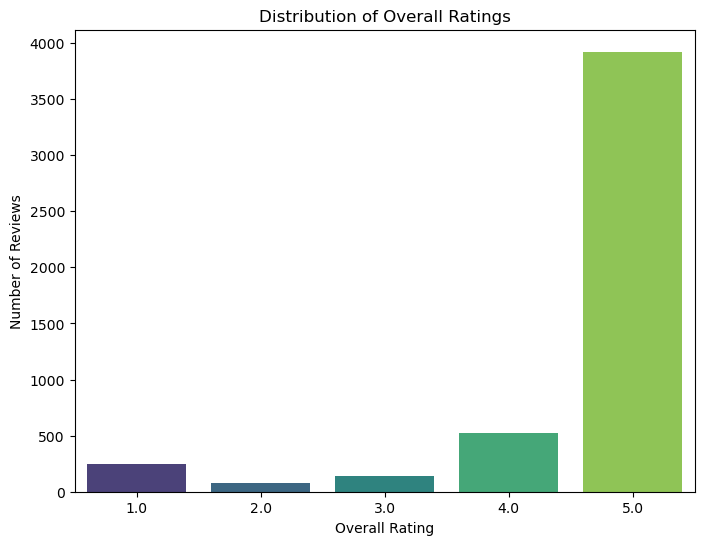

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df, palette='viridis')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Number of Reviews')
plt.show()


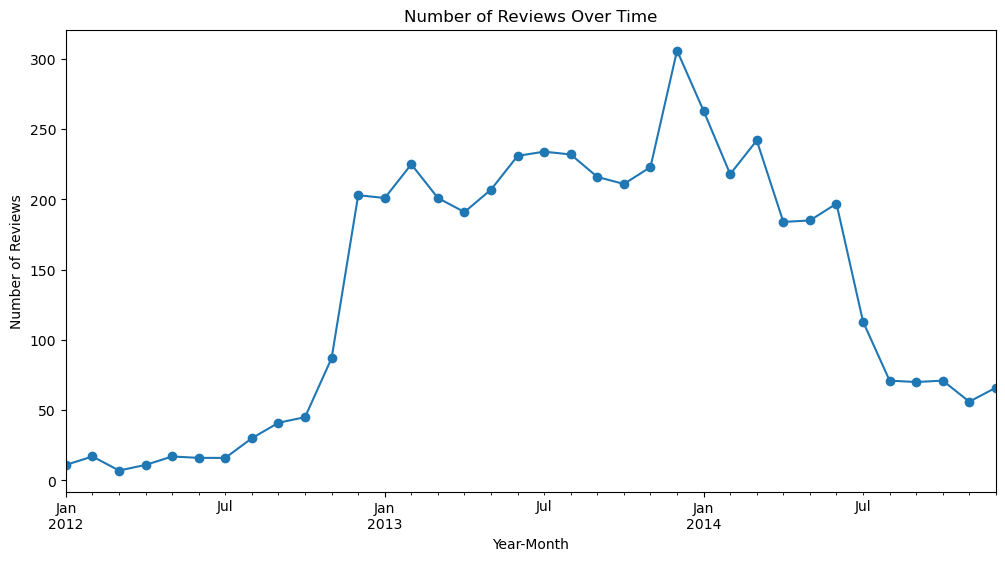

In [30]:
#Timeseries Analysis

df['reviewTime'] = pd.to_datetime(df['reviewTime'])


df['year_month'] = df['reviewTime'].dt.to_period('M')


plt.figure(figsize=(12, 6))
df['year_month'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.show()


/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype

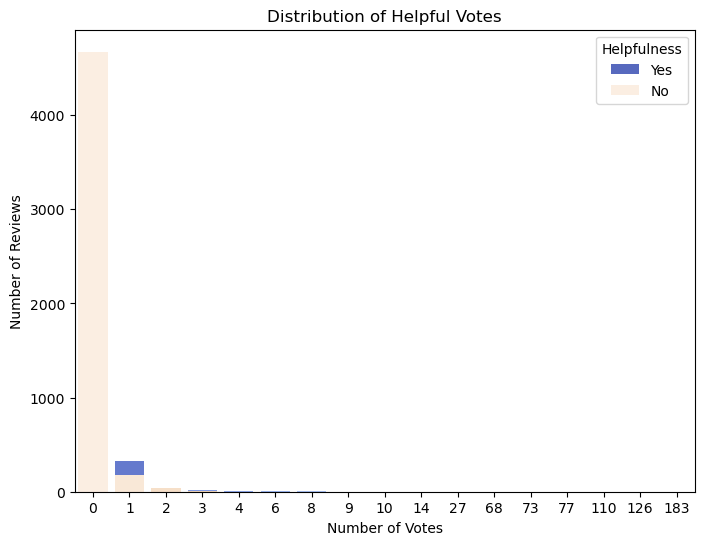

In [31]:

plt.figure(figsize=(8, 6))
sns.countplot(x='helpful_yes', data=df, palette='coolwarm', label='Yes')
sns.countplot(x='helpful_no', data=df, palette='Oranges', label='No') 
plt.title('Distribution of Helpful Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Number of Reviews')
plt.legend(title='Helpfulness')
plt.show()



/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/monicafam/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


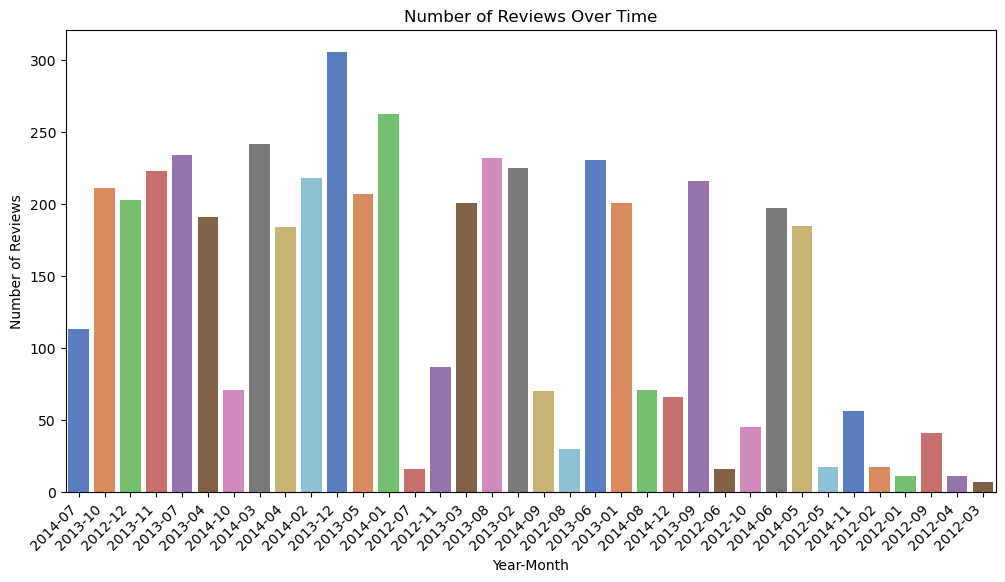

In [32]:
#Bar Timeseries
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

df['year_month'] = df['reviewTime'].dt.to_period('M')

plt.figure(figsize=(12, 6))
sns.countplot(x='year_month', data=df, palette='muted')
plt.title('Number of Reviews Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()


In [33]:
#text analysis

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

corpus = data_clean_df['narrative']

vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(corpus)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")


Topic #1: card, phone, sd, gb, memory, adapter, works, micro, tablet, great
Topic #2: card, gb, sandisk, cards, phone, just, read, work, format, class
Topic #3: sandisk, card, price, good, great, works, memory, product, speed, cards
Topic #4: galaxy, works, samsung, great, music, storage, note, tablet, use, gb
Topic #5: camera, card, video, gopro, works, use, great, memory, fast, hd


In [37]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 48.8 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
import nltk
import spacy
import pandas as pd
import numpy as np
import sklearn
import plotly
import re
import string
import os
import multiprocessing as mp
import spacy 
import spacy
nlp = spacy.load('en_core_web_sm')


In [39]:
new_dir = "/Users/monicafam/Desktop/"
os.chdir(new_dir)


current_dir = os.getcwd()
print("Current directory:", current_dir)

Current directory: /Users/monicafam/Desktop


In [41]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string


def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def remove_numbers(text):
    
    pass

def remove_punctuation(text):
    pass

def clean_part_of_speech(text):
    
    pass

def remove_X(text):
    pass

def clean_white_space(text):
    pass


In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = {
    'reviewText': [
        "This is a positive review.",
        "This is another positive review.",
        "This is a negative review.",
        "This is another negative review."
    ],
    'sentiment': [1, 1, 0, 0]
}

df_raw = pd.DataFrame(data)

def run_clean_job(ls):
    clean_text = list()
    for narrative in ls:
        if narrative is not None and len(narrative) > 0:
            narrative = narrative.strip()
            clean_text.append(narrative)
    return clean_text


df_raw["clean_narrative"] = run_clean_job(df_raw["reviewText"])


df_clean = pd.DataFrame({
    'clean_narrative': df_raw["clean_narrative"],
    'sentiment': df_raw["sentiment"]
})


X_train, X_test, y_train, y_test = train_test_split(
    df_clean['clean_narrative'],
    df_clean['sentiment'],
    test_size=0.2,
    random_state=42
)


In [62]:
df = pd.read_csv('amazon_reviews.csv')
n_rows = 100000
df_raw = pd.read_csv("amazon_reviews.csv").head(n_rows)
df_raw.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [63]:
data_clean = dict()

In [64]:
print(data_clean.keys())

dict_keys([])


In [67]:
# identify commentary that matches
data_clean["narrative"] = np.array(df_raw["reviewText"])
data_clean["clean narrative"] = list()
data_clean["vector"] = list()
data_clean["score"] = list()
# create groups to track frequency
data_clean["date"] = np.array(df_raw["reviewTime"])
data_clean["date group"] = list()

In [68]:
data_clean["narrative"][1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [69]:

def clean_white_space(text):
    return re.sub(' +', ' ', text)

def remove_numbers(text):
    return re.sub(r'[0-9]', '', text)

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

POSSIBLE_POS = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"}
KEEP_POS = {"NOUN", "VERB", "PROPN"}
def clean_part_of_speech(text):
    keep = list()
    tokens = nlp(text)
    for token in tokens:
        if token.pos_ in KEEP_POS:
            keep.append(token.text)
    return " ".join(keep)


stopwords = nlp.Defaults.stop_words
def remove_stop_words(text):
    keep = list()
    tokens = nlp(text)
    for token in tokens:
        if token.text.lower().strip() not in stopwords:
            keep.append(token.text)
    return " ".join(keep)


def remove_X(text):
    return text.replace("X", "")


# clean
def run_clean_job(ls):
    clean_text = list()
    for narrative in ls:
        narrative = narrative.strip()
        narrative = remove_numbers(narrative)
        narrative = remove_punctuation(narrative)
        narrative = remove_stop_words(narrative)
        narrative = clean_part_of_speech(narrative)
        narrative = remove_X(narrative)
        narrative = clean_white_space(narrative)
        clean_text.append(narrative)
    return clean_text



In [70]:
def convert_floats_to_strings(text_array):
    # Convert each element to string and process
    for i, text in np.ndenumerate(text_array):
        # Convert bytes-like object to string
        text_str = text.decode('utf-8') if isinstance(text, bytes) else str(text)

        # Regular expression pattern to match floats
        float_pattern = r'\b\d+\.\d+\b'

        # Find all floats in the text
        floats = re.findall(float_pattern, text_str)

        # Replace each float with its string representation
        for float_str in floats:
            text_str = text_str.replace(float_str, str(float_str))

        # Assign the modified text back to the array
        text_array[i] = text_str

    return text_array





In [71]:
# Convert bytes to strings and convert floats to strings
convert_floats_to_strings(data_clean["narrative"])
run_clean_job(data_clean["narrative"])
print("done")

done


In [72]:
data_clean["narrative"][1]

'Purchased this for my device, it worked as advertised. You can never have too much phone memory, since I download a lot of stuff this was a no brainer for me.'

In [73]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/monicafam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [74]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment of a sentence
sentences = data_clean["narrative"]
sentiment_scores = []

for i, sentence in enumerate(sentences):
    scores = sid.polarity_scores(sentence)
    sentiment_scores.append((i, scores['compound']))

sentiment_scores.sort(key=lambda x: x[1], reverse=True)


print("Top 10 ranked sentences:")
for rank, (index, _) in enumerate(sentiment_scores[:10], start=1):
    print(f"Sentence at index {index} is ranked {rank}.")


print("\nBottom 10 ranked sentences:")
for rank, (index, _) in enumerate(sentiment_scores[-10:], start=1):
    print(f"Sentence at index {index} is ranked {len(sentiment_scores) - rank + 1}.")

Top 10 ranked sentences:
Sentence at index 4212 is ranked 1.
Sentence at index 2031 is ranked 2.
Sentence at index 2576 is ranked 3.
Sentence at index 2802 is ranked 4.
Sentence at index 2881 is ranked 5.
Sentence at index 4634 is ranked 6.
Sentence at index 1177 is ranked 7.
Sentence at index 4423 is ranked 8.
Sentence at index 3449 is ranked 9.
Sentence at index 2993 is ranked 10.

Bottom 10 ranked sentences:
Sentence at index 4092 is ranked 4915.
Sentence at index 4034 is ranked 4914.
Sentence at index 1176 is ranked 4913.
Sentence at index 4587 is ranked 4912.
Sentence at index 4368 is ranked 4911.
Sentence at index 1760 is ranked 4910.
Sentence at index 2889 is ranked 4909.
Sentence at index 3589 is ranked 4908.
Sentence at index 1904 is ranked 4907.
Sentence at index 615 is ranked 4906.


In [75]:
sentence = data_clean["narrative"][4212  ]
scores = sid.polarity_scores(sentence)
print(scores)

{'neg': 0.045, 'neu': 0.814, 'pos': 0.141, 'compound': 0.9994}


In [76]:

def label_row(value):
    if value == 5 or value == 4:
        return 1
    elif value == 2 or value == 1:
        return -1
    else:
        return 0
    
# Apply the function to create a new column with labels
df_raw['sentiment'] = df_raw['overall'].apply(lambda x: label_row(x))

In [77]:
df_raw

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,sentiment
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,1
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,1
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,1
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,1
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0,-1
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0,1
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0,1
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0,1


In [78]:
def label_row(value):
    if value == 5 or value == 4:
        return 1
    elif value == 2 or value == 1:
        return -1
    else:
        return 0
    
# Apply the function to create a new column with labels
df_raw['sentiment'] = df_raw['overall'].apply(lambda x: label_row(x))

In [79]:
positvedf = filtered_df = df_raw[df_raw['sentiment'] == 1]
neutraldf = filtered_df = df_raw[df_raw['sentiment'] == 0]
negativedf = filtered_df = df_raw[df_raw['sentiment'] == -1]

In [80]:
print(len(positvedf))
print(len(neutraldf))
print(len(negativedf))

4449
142
324


In [81]:
from sklearn.model_selection import train_test_split


In [82]:
x_train, x_test, y_train, y_test = train_test_split(df_raw["reviewText"], df_raw["sentiment"], test_size=0.3, random_state=42)

In [83]:
x_train

2217    Popped in my Galaxy S5. Works.Disk came with a...
3405    My new Android phone (T-Mobile upgrade) has a ...
2770    I don't know why but I just needed some space....
286     What more can you ask for ?  No errors ever de...
2245    Very fast reading and writing for my samsung g...
                              ...                        
4426    Use with my GoPro Hero 3 & class 10 is a must....
466     Fast shipping & delivered as described.Phone d...
3092    Bought two, one for me and one for my husband....
3772    This 32GB card is fast.  Great for storing vid...
860     Previously purchased two ADATA microsd cards o...
Name: reviewText, Length: 3440, dtype: object

In [84]:
y_train

2217    1
3405    1
2770    1
286     1
2245    1
       ..
4426    1
466     1
3092    1
3772    1
860     1
Name: sentiment, Length: 3440, dtype: int64

In [85]:
print("Shape of training data (X_train):", x_train.shape)
print("Shape of testing data (X_test):", x_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)

Shape of training data (X_train): (3440,)
Shape of testing data (X_test): (1475,)
Shape of training labels (y_train): (3440,)
Shape of testing labels (y_test): (1475,)


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [94]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold

data = {
    'reviewText': [
        "This is a positive review.",
        "This is another positive review.",
        "This is a negative review.",
        "This is another negative review."
    ],
    'sentiment': [1, 1, 0, 0]
}

df_raw = pd.DataFrame(data)

def run_clean_job(ls):
    clean_text = list()
    for narrative in ls:
        if narrative is not None and len(narrative) > 0:
            narrative = narrative.strip()
            clean_text.append(narrative)
    return clean_text

df_raw["clean_narrative"] = run_clean_job(df_raw["reviewText"])

df_clean = pd.DataFrame({
    'clean_narrative': df_raw["clean_narrative"],
    'sentiment': df_raw["sentiment"]
})

n_splits = 2
stratified_kfold = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

train_indices_list = []
test_indices_list = []

for train_index, test_index in stratified_kfold.split(df_clean['clean_narrative'], df_clean['sentiment']):
    train_indices_list.append(train_index)
    test_indices_list.append(test_index)

split_index = 0
train_indices = train_indices_list[split_index]
test_indices = test_indices_list[split_index]

X_train = df_clean['clean_narrative'].iloc[train_indices]
y_train = df_clean['sentiment'].iloc[train_indices]
X_test = df_clean['clean_narrative'].iloc[test_indices]
y_test = df_clean['sentiment'].iloc[test_indices]


In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_clean['clean_narrative'],
    df_clean['sentiment'],
    test_size=0.5,  
    random_state=42,
    stratify=df_clean['sentiment']
)


In [98]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [99]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_vectorized, y_train)


MultinomialNB()

In [100]:
predictions = naive_bayes.predict(X_test_vectorized)


In [101]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2


Confusion Matrix:
 [[1 0]
 [0 1]]


In [102]:
print("Unique values in y_test:", y_test.unique())


Unique values in y_test: [1 0]


In [104]:
print("y shape:", df_clean['sentiment'].shape)

y shape: (4,)


In [106]:
print("X shape:", X.shape)
print("y shape:", df_clean['sentiment'].shape)


X shape: (4915, 1000)
y shape: (4,)


In [107]:
X_dense = X.toarray()


In [124]:
!pip install --upgrade setuptools wheel


  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
Using cached wheel-0.42.0-py3-none-any.whl (65 kB)
  Attempting uninstall: wheel
    Found existing installation: wheel 0.38.4
    Uninstalling wheel-0.38.4:
      Successfully uninstalled wheel-0.38.4


In [ ]:
!sudo apt-get install build-essential


Password:

In [123]:
!pip install imbalanced-learn==0.12.0
!pip install scikit-learn==1.0.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 7.4 MB/s eta 0:00:0000:0100:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1494 lines of output]
      Partial import of sklearn during the build process.
      setup.py:128: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command.build_ext import build_ext  # noqa
      INFO: C compiler:

In [1]:
import sklearn
import imblearn

print("scikit-learn version:", sklearn.__version__)
print("imbalanced-learn version:", imblearn.__version__)


scikit-learn version: 1.4.1.post1
imbalanced-learn version: 0.12.0
